# Prediction of Median House Value using Random Forest

## Importing Necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Loading the data

In [2]:
data=pd.read_csv("D:/DATASCIENCE/MLQuest/california houses dataset_final.csv")
data

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.1583,735501.8070,67432.51700,21250.21377
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733070,554279.8501,733236.8844,65049.90857,20880.60040
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.7171,733525.6829,64867.28983,18811.48745
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.2661,734095.2907,65287.13841,18031.04757
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.2661,734095.2907,65287.13841,18031.04757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481100,654530.1863,830631.5430,248510.05820,222619.89040
20636,77100.0,2.5568,18,697,150,356,114,39.49,-121.21,160445.433500,659747.0684,836245.9152,246849.88890,218314.42460
20637,92300.0,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341200,654042.2140,830699.5732,240172.22050,212097.93620
20638,84700.0,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022200,657698.0077,834672.4619,238193.86590,207923.19920


This is a dataset which contains the Median house prices for California districts derived from the 1990 census.
Based on the information from the 1990 census, the data is about the dwellings that may be in a certain California district and some basic statistics about them. The columns are as follows:

* Median House Value: Median house value for households within a block

* Median Income: Median income for households within a block of houses
* Median age: Median age of a house within a block

* Total rooms: Total number of rooms within a block

* Total bedrooms: Total number of bedrooms within a block
* Population: Total number of people residing within a block

* Households: Total number of households, a group of people residing within a home unit, for a block

* Latitude: A measure of how far north a house is; a higher value is farther north

* Longitude: A measure of how far west a house is; a higher value is farther west
* Distance to coast: Distance to the nearest coast point

* Distance to Los Angeles: Distance to the centre of Los Angeles

* Distance to San Diego: Distance to the centre of San Diego
* Distance to San Jose: Distance to the centre of San Jose

* Distance to San Francisco: Distance to the centre of San Francisco

## Data Exploration

In [3]:
# Display the first five rows of the data

data.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.1583,735501.8070,67432.51700,21250.21377
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733070,554279.8501,733236.8844,65049.90857,20880.60040
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.7171,733525.6829,64867.28983,18811.48745
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.2661,734095.2907,65287.13841,18031.04757
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.2661,734095.2907,65287.13841,18031.04757


In [4]:
# Display the number of rows and columns of the data

data.shape

(20640, 14)

In [5]:
# Get the column labels 

data.columns

Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco'],
      dtype='object')

In [6]:
# Summary of data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [7]:
# Descriptive statistics 

data.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928650,117395.477500
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019100,1.736675e+05,2.147398e+05,459758.877000,526546.661700
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414478,5.271562e+05,7.057954e+05,516946.491000,584552.007950
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686400,1.018260e+06,1.196919e+06,836762.678200,903627.663300


Given the dataset containing information about houses in different California districts, including factors such as median house value, median income, median age, total rooms, total bedrooms, population, households, latitude, longitude, and distances to various cities, the
problem is to develop a model that can accurately predict the median house value for a given block based on the available features.

## Outlier Detection and Removal

In [8]:
# Identify numerical columns for outlier detection
# Columns to check for outliers

numerical_columns = ['Tot_Rooms', 'Households', 'Population', 'Median_House_Value']

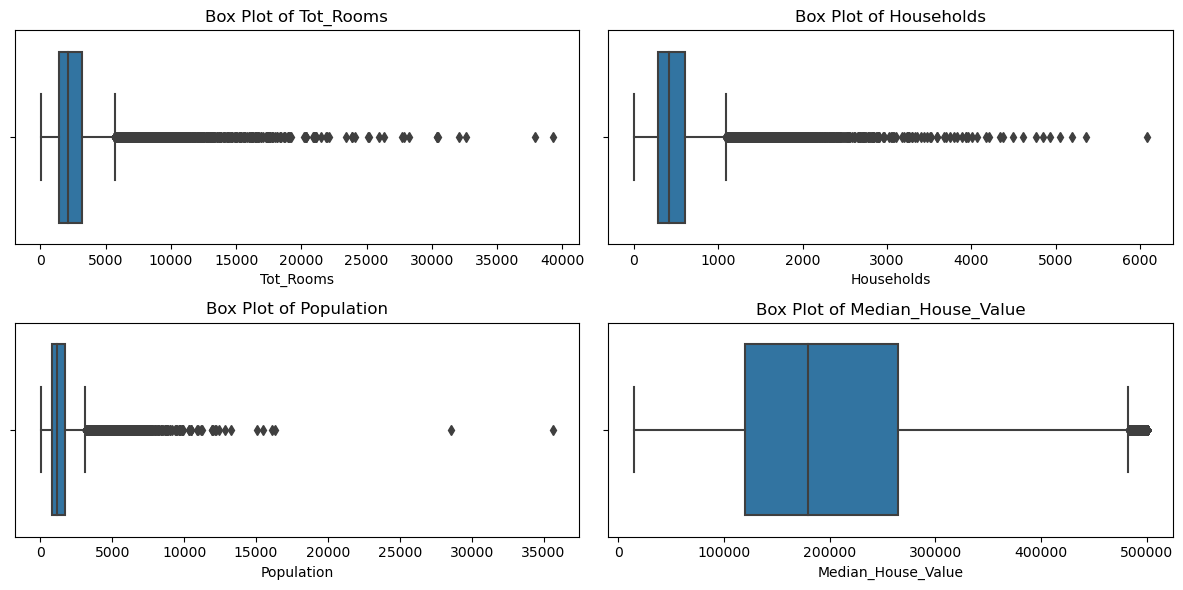

In [9]:
# Visualize outliers using box plots

plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

In [10]:
# Defining a function 'remove_outliers' to remove outliers based on the interquartile range

def remove_outliers(data, columns, k=1.5):
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - k * iqr
        upper_bound = q3 + k * iqr
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

In [11]:
# Removing outliers from the dataset using the function

data_no_outliers = remove_outliers(data, numerical_columns)

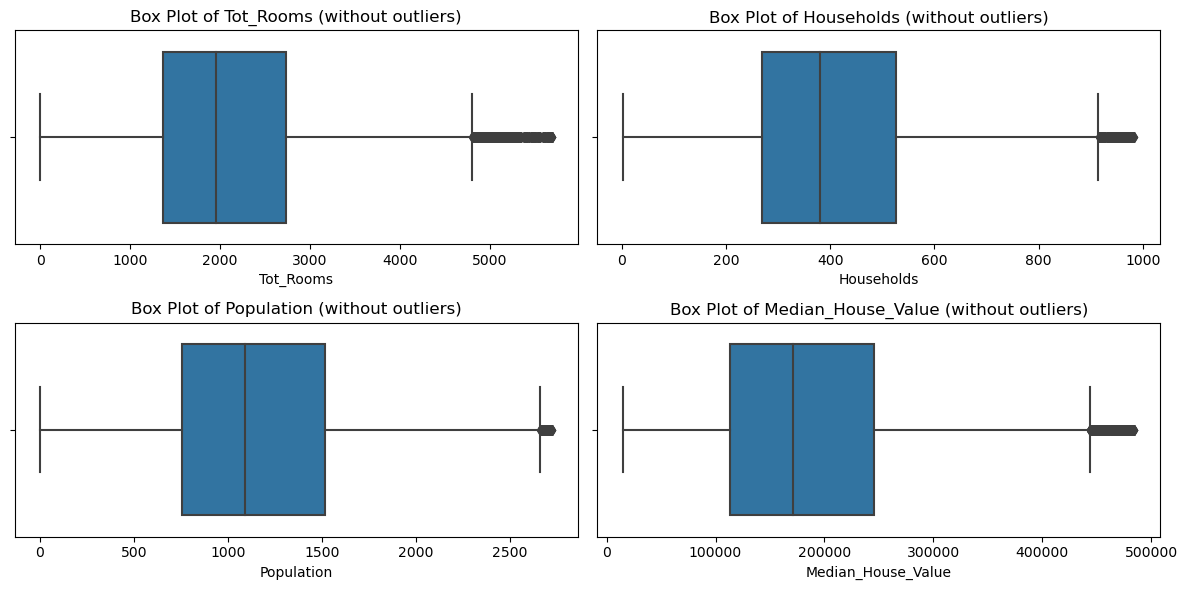

In [12]:
# Visualization of data without outliers using boxplots

plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=data_no_outliers[col])
    plt.title(f'Box Plot of {col} (without outliers)')
plt.tight_layout()
plt.show()

In [13]:
data_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17411 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        17411 non-null  float64
 1   Median_Income             17411 non-null  float64
 2   Median_Age                17411 non-null  int64  
 3   Tot_Rooms                 17411 non-null  int64  
 4   Tot_Bedrooms              17411 non-null  int64  
 5   Population                17411 non-null  int64  
 6   Households                17411 non-null  int64  
 7   Latitude                  17411 non-null  float64
 8   Longitude                 17411 non-null  float64
 9   Distance_to_coast         17411 non-null  float64
 10  Distance_to_LA            17411 non-null  float64
 11  Distance_to_SanDiego      17411 non-null  float64
 12  Distance_to_SanJose       17411 non-null  float64
 13  Distance_to_SanFrancisco  17411 non-null  float64
dtypes: flo

In [14]:
data_no_outliers.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,17411.000000,17411.000000,17411.000000,17411.000000,17411.000000,17411.000000,17411.000000,17411.000000,17411.000000,17411.000000,1.741100e+04,1.741100e+04,17411.000000,17411.000000
mean,189502.325886,3.647753,29.515536,2109.214175,433.706335,1158.927402,405.337603,35.703761,-119.609446,42528.456227,2.775390e+05,4.068207e+05,345938.805582,382422.641696
std,96423.197893,1.560401,12.256662,1060.772599,210.848694,557.560406,193.901340,2.168498,2.006269,50997.014914,2.499061e+05,2.921991e+05,216243.148294,249130.422984
min,14999.000000,0.499900,1.000000,2.000000,2.000000,3.000000,2.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,113000.000000,2.501000,19.000000,1360.500000,283.000000,756.000000,268.000000,33.940000,-121.790000,9697.822862,3.284638e+04,1.598641e+05,115588.527250,119421.573400
50%,171200.000000,3.425000,30.000000,1956.000000,404.000000,1092.000000,381.000000,34.350000,-118.620000,21136.854650,1.813334e+05,2.395210e+05,445565.565300,510328.647500
75%,245300.000000,4.555450,38.000000,2736.000000,562.000000,1519.000000,526.500000,37.740000,-118.020000,53589.913670,5.323133e+05,7.109072e+05,515505.612750,583217.696700
max,484700.000000,15.000100,52.000000,5688.000000,1526.000000,2725.000000,984.000000,41.950000,-114.310000,333804.686400,1.018260e+06,1.196919e+06,836762.678200,903627.663300


## Data Splitting and Preprocessing

In [15]:
# Split the data into features (X) and target variable (y)

X = data_no_outliers.drop(columns=['Median_House_Value'])
y = data_no_outliers['Median_House_Value']

In [16]:
# Handling missing values 

X.fillna(0, inplace=True)  # Replace missing values with 0, or you can use other imputation techniques

In [17]:
# Splited the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Engineering

In [18]:
# Creating two new features

data_no_outliers['Feature1'] = data_no_outliers['Tot_Rooms'] / data_no_outliers['Households']
data_no_outliers['Feature2'] = data_no_outliers['Population'] / data_no_outliers['Tot_Rooms']

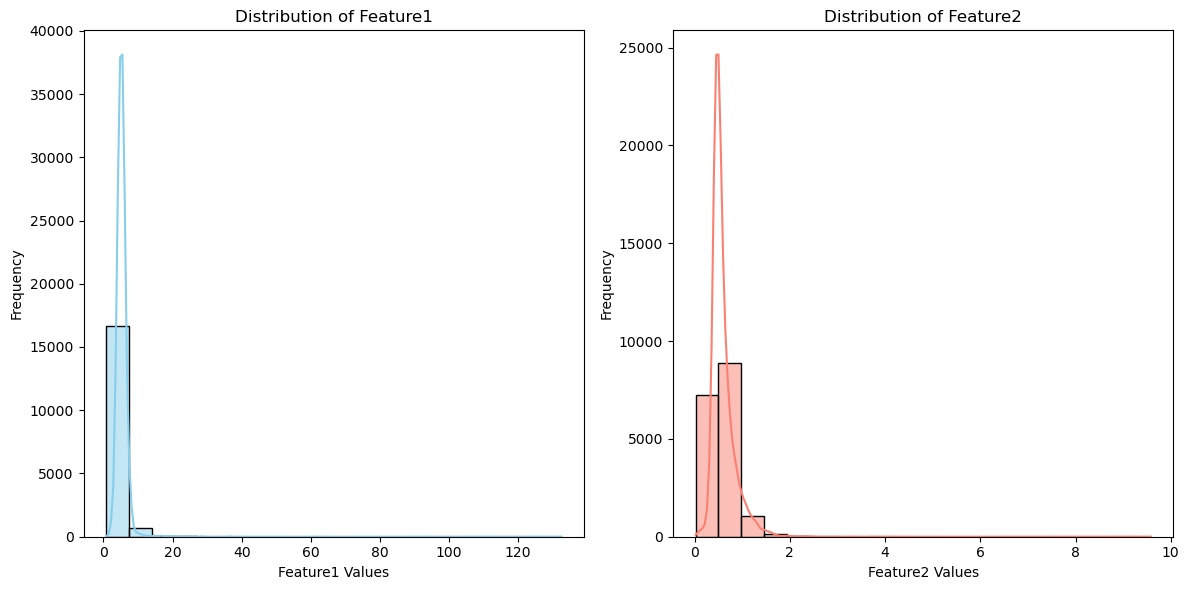

In [19]:
plt.figure(figsize=(12, 6))

# Plot for Feature1
plt.subplot(1, 2, 1)
sns.histplot(data_no_outliers['Feature1'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Feature1')
plt.xlabel('Feature1 Values')
plt.ylabel('Frequency')

# Plot for Feature2
plt.subplot(1, 2, 2)
sns.histplot(data_no_outliers['Feature2'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Feature2')
plt.xlabel('Feature2 Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Both distributions are unimodal and approximately bell-shaped, but the distribution of Feature 1 values is much wider and has a higher mean than the distribution of Feature 2 values. This suggests that Feature 1 values are more variable than Feature 2 values.

In [20]:
# Adding a new feature 'Rooms_per_Household'

X_train['Rooms_per_Household'] = X_train['Tot_Rooms'] / X_train['Households']
X_test['Rooms_per_Household'] = X_test['Tot_Rooms'] / X_test['Households']

In [21]:
# Feature scaling to normalize the data 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Hyperparameter Tuning

In [22]:
# Hyperparameter Tuning using RandomizedSearchCV
# Created a Random Forest Regression model

rf_model = RandomForestRegressor(random_state=42)

In [23]:
# Defined the hyperparameter grid for tuning

param_grid = {
    'n_estimators': [100, 200, 300],          # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],            # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]               # Whether bootstrap samples are used when building trees
}

In [24]:
# Performed Randomized Search for hyperparameter tuning

random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=10, cv=5, random_state=42,n_jobs=-1)
random_search.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42)

In [25]:
# Got the best hyperparameters

best_params = random_search.best_params_
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 20, 'bootstrap': True}


## Model Training and Evaluation

In [26]:
# Trained the model with the best hyperparameters
# Created and trained the Random Forest Regression model with the best hyperparameters

rf_model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    bootstrap=best_params['bootstrap'],
    random_state=42
    )
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=4, n_estimators=200,
                      random_state=42)

In [27]:
# Evaluated the model
# Made predictions on the test set

y_pred = rf_model.predict(X_test_scaled)

In [28]:
# Evaluated the model using mean squared error (MSE) and R-squared (R2) metrics

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [29]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1648830059.7358465
R-squared: 0.8184964731808395


The Random Forest Regression  achieves a lower MSE and a higher R-squared value. This suggests that the Random Forest model provides better predictions.

## Prediction on New Data

In [30]:
X_new = X_test_scaled

In [31]:
y_new_pred = rf_model.predict(X_new)

In [32]:
y_new_pred

array([ 82145.5868756 , 156809.81938062,  97967.54150302, ...,
       240137.2460892 , 134756.08397436, 159800.16141432])

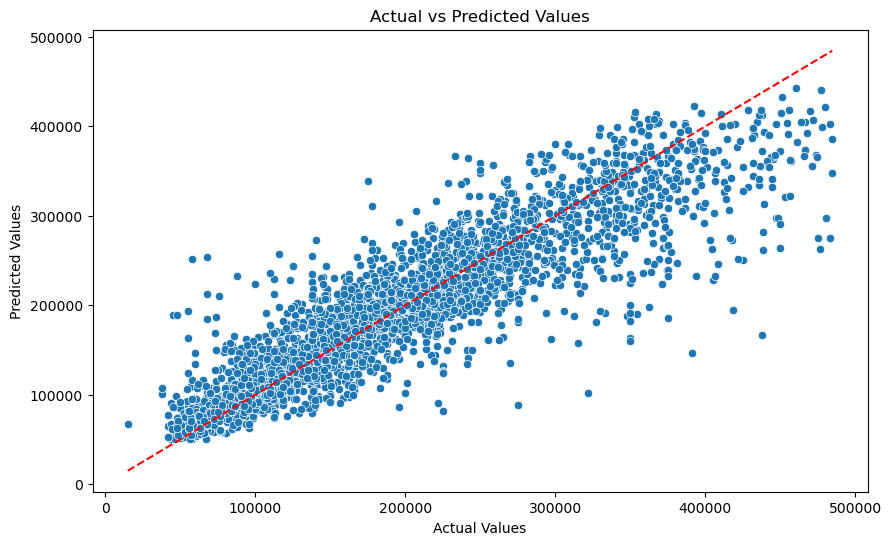

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Diagonal line
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
